# Analyse the datasets


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

## Import the first CSV file of 168
Import the first csv-file from the UK smartmeter data set found [here](https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households) and analyse it graphically.

In [69]:
filenames = sorted(glob.glob('uk-smart-meter-data/LCL-June2015v2_*.csv'))
number_of_files = 20
data = pd.DataFrame()
for filename in filenames[:number_of_files+1]:
    data = pd.concat([data, pd.read_csv(filename)])

data.head(10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
5,MAC000002,Std,2012-10-12 03:00:00.0000000,0
6,MAC000002,Std,2012-10-12 03:30:00.0000000,0
7,MAC000002,Std,2012-10-12 04:00:00.0000000,0
8,MAC000002,Std,2012-10-12 04:30:00.0000000,0
9,MAC000002,Std,2012-10-12 05:00:00.0000000,0


## Number of households in the first file

In [70]:
data['LCLid'].nunique()

3211

## Load the tariff data set

In [71]:
tariff_data = pd.read_excel('uk-smart-meter-data/Tariffs.xlsx')
tariff_data.head(10)

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
5,2013-01-01 02:30:00,Normal
6,2013-01-01 03:00:00,Normal
7,2013-01-01 03:30:00,Normal
8,2013-01-01 04:00:00,Normal
9,2013-01-01 04:30:00,Normal


In [72]:
tariff_data.dtypes

TariffDateTime    datetime64[ns]
Tariff                    object
dtype: object

In [73]:
tariff_data.loc[tariff_data['Tariff'] == 'Normal', 'Tariff'] = 0
tariff_data.loc[tariff_data['Tariff'] == 'Low', 'Tariff'] = -1
tariff_data.loc[tariff_data['Tariff'] == 'High', 'Tariff'] = 1
tariff_data.head(10)

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,0
1,2013-01-01 00:30:00,0
2,2013-01-01 01:00:00,0
3,2013-01-01 01:30:00,0
4,2013-01-01 02:00:00,0
5,2013-01-01 02:30:00,0
6,2013-01-01 03:00:00,0
7,2013-01-01 03:30:00,0
8,2013-01-01 04:00:00,0
9,2013-01-01 04:30:00,0


In [74]:
nullfilter = data['KWH/hh (per half hour) '] == 'Null'
data[nullfilter].count()

LCLid                      3205
stdorToU                   3205
DateTime                   3205
KWH/hh (per half hour)     3205
dtype: int64

It appears that there are zero values in the data column for power.

In [75]:
data[data['KWH/hh (per half hour) '] == 0].count()

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64

## Transform data and coerce Null to NaN

We transform the data into numerical form and coerce 'Null' to NaN

In [76]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['KWH/hh (per half hour) '] = pd.to_numeric(data['KWH/hh (per half hour) '], errors='coerce')
data[data['KWH/hh (per half hour) '] == 0].count()


LCLid                      1250456
stdorToU                   1250456
DateTime                   1250456
KWH/hh (per half hour)     1250456
dtype: int64

## Number of NaN values in the kwh column

In [77]:
data.isnull().sum()

LCLid                         0
stdorToU                      0
DateTime                      0
KWH/hh (per half hour)     3205
dtype: int64

In [78]:
data[data['KWH/hh (per half hour) '] == 0].count()

LCLid                      1250456
stdorToU                   1250456
DateTime                   1250456
KWH/hh (per half hour)     1250456
dtype: int64

## Select a couple of households

In [79]:
data_first_five_ids = data[data['LCLid'].isin(data['LCLid'].unique()[0:9])]
unique_lclid_count = data_first_five_ids['LCLid'].nunique()
data_first_five_ids.dtypes
data_first_five_ids.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00,0.0
1,MAC000002,Std,2012-10-12 01:00:00,0.0
2,MAC000002,Std,2012-10-12 01:30:00,0.0
3,MAC000002,Std,2012-10-12 02:00:00,0.0
4,MAC000002,Std,2012-10-12 02:30:00,0.0


/var/folders/9k/wg_0_d_15d3_g61jr75crzp80000gn/T/ipykernel_15036/739845211.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


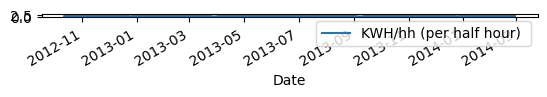

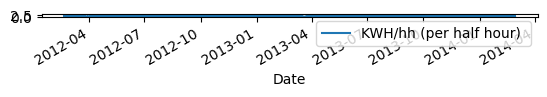

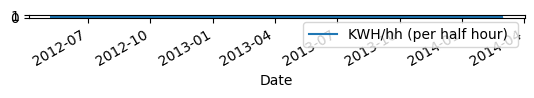

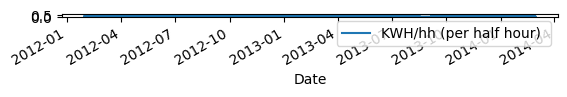

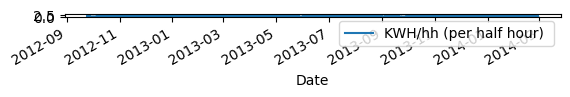

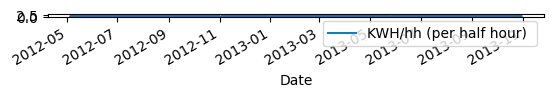

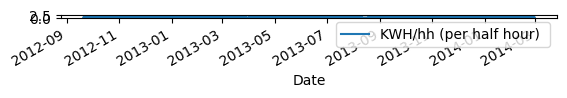

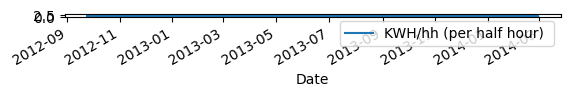

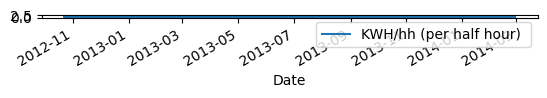

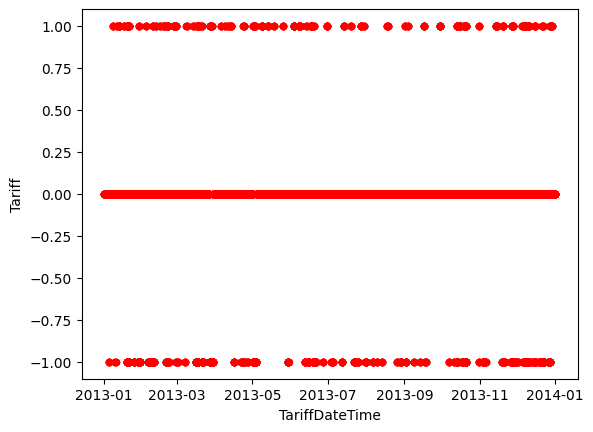

In [88]:
# Group by LCLid and plot 'KWH/hh (per half hour) ' over 'DateTime' in subplots axs
data_first_five_ids.groupby('LCLid').plot(
    x='DateTime',
    y='KWH/hh (per half hour) ',
    subplots=True,
    layout=(number_of_files, 1),
    sharex=True,
    # sharey=True,
    xlabel='Date',
    # ylabel='KWH/hh'
    )
plt.tight_layout()
tariff_data.plot.scatter(x='TariffDateTime', y='Tariff', color='red')
plt.show()



# Group by LCLid and change format to a timeseries

In [98]:
df = data.drop(columns=['stdorToU'])
df

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC000002,2012-10-12 00:30:00,0.000
1,MAC000002,2012-10-12 01:00:00,0.000
2,MAC000002,2012-10-12 01:30:00,0.000
3,MAC000002,2012-10-12 02:00:00,0.000
4,MAC000002,2012-10-12 02:30:00,0.000
...,...,...,...
999995,MAC001520,2012-09-10 12:30:00,0.078
999996,MAC001520,2012-09-10 13:00:00,0.069
999997,MAC001520,2012-09-10 13:30:00,0.106
999998,MAC001520,2012-09-10 14:00:00,0.068


In [105]:
df.dropna(subset=['KWH/hh (per half hour) '], inplace=True)
df

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC000002,2012-10-12 00:30:00,0.000
1,MAC000002,2012-10-12 01:00:00,0.000
2,MAC000002,2012-10-12 01:30:00,0.000
3,MAC000002,2012-10-12 02:00:00,0.000
4,MAC000002,2012-10-12 02:30:00,0.000
...,...,...,...
999995,MAC001520,2012-09-10 12:30:00,0.078
999996,MAC001520,2012-09-10 13:00:00,0.069
999997,MAC001520,2012-09-10 13:30:00,0.106
999998,MAC001520,2012-09-10 14:00:00,0.068


In [110]:
# Counter number of duplicates
print('Number of duplicates: ', df.duplicated(subset=['DateTime', 'LCLid']).sum())
df_unique = df.drop_duplicates(subset=['DateTime', 'LCLid'], keep='last')
# df_unique = df.groupby(['DateTime', 'LCLid'], as_index=False).mean().reset_index(drop=True)
# Counter number of duplicates
print('Number of duplicates: ', df_unique.duplicated(subset=['DateTime', 'LCLid']).sum())


Number of duplicates:  69313
Number of duplicates:  0


In [116]:
pivoted = df_unique.pivot(index='DateTime', columns='LCLid', values='KWH/hh (per half hour) ')
pivoted['datetime'] = pivoted.index


In [117]:
pivoted


LCLid,MAC000002,MAC000003,MAC000004,MAC000005,MAC000006,MAC000007,MAC000008,MAC000009,MAC000010,MAC000011,...,MAC005555,MAC005557,MAC005558,MAC005561,MAC005562,MAC005564,MAC005565,MAC005566,MAC005567,datetime
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-23 09:00:00
2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-23 09:30:00
2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-23 10:00:00
2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-23 10:30:00
2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-23 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-27 22:00:00,0.416,0.042,0.167,0.248,0.067,0.282,NaN,0.193,0.534,0.171,...,0.119,0.143,0.0,0.361,0.427,0.121,NaN,0.141,0.173,2014-02-27 22:00:00
2014-02-27 22:30:00,1.350,0.117,0.000,0.113,0.047,0.346,NaN,0.338,0.478,0.145,...,0.062,0.125,0.0,0.088,0.336,0.135,NaN,0.123,0.205,2014-02-27 22:30:00
2014-02-27 23:00:00,1.247,0.064,0.000,0.111,0.014,0.168,NaN,0.207,0.584,0.118,...,0.113,0.171,0.0,0.087,0.167,0.077,NaN,0.155,0.221,2014-02-27 23:00:00


<Axes: xlabel='DateTime'>

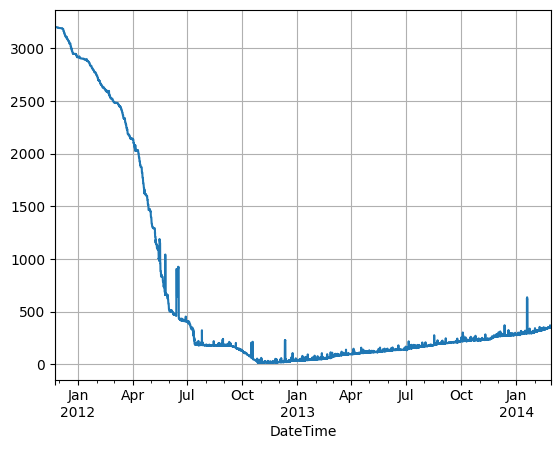

In [120]:
# How many households have no NaN values?
pivoted.isnull().sum(axis=1).plot(label='Number of NaN values', grid=True)

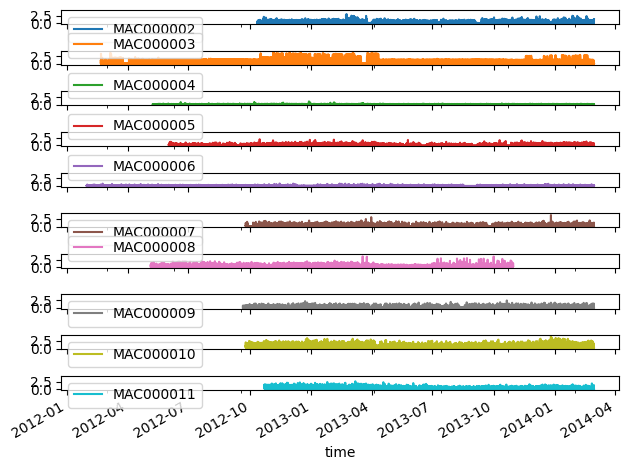

In [87]:
# Group by LCLid and plot 'KWH/hh (per half hour) ' over 'DateTime' in subplots axs
pivoted.loc[:, pivoted.columns[0:10]].plot(
    subplots=True,
    # layout=(number_of_files, 1),
    # sharex=True,
    sharey=True,
    xlabel='time',
    # ylabel='KWH/hh'
    )
plt.tight_layout()
plt.show()

In [115]:
# Remove rows where the value is NaN
pivoted.dropna(axis=0, inplace=True)
pivoted


LCLid,MAC000002,MAC000003,MAC000004,MAC000005,MAC000006,MAC000007,MAC000008,MAC000009,MAC000010,MAC000011,...,MAC005557,MAC005558,MAC005561,MAC005562,MAC005564,MAC005565,MAC005566,MAC005567,datetime,group
DateTime,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Group by consecutive runs of entries using cumcount
pivoted['group'] = (pivoted['datetime'] - pivoted['datetime'].shift()).ne(pd.Timedelta('0.5h')).cumsum()
pivoted

In [ ]:

# Find the longest run of consecutive entries
longest_run = pivoted.groupby('group').size().max()

print("Longest run of consecutive entries:", longest_run)